In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import optuna
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier,ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from scipy.stats import yeojohnson, boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve

warnings.filterwarnings("ignore")

%matplotlib inline

# Load Dataset

In [76]:
train_data = pd.read_csv('Data/loan_data_2007_2014.csv')
train_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

In [77]:
train_data.shape

(466285, 75)

In [78]:
train_data.isnull().sum().sum()

9776227

In [3]:
train_data.describe()

Unnamed: 0            id     member_id      loan_amnt  \
count  466285.000000  4.662850e+05  4.662850e+05  466285.000000   
mean   233142.000000  1.307973e+07  1.459766e+07   14317.277577   
std    134605.029472  1.089371e+07  1.168237e+07    8286.509164   
min         0.000000  5.473400e+04  7.047300e+04     500.000000   
25%    116571.000000  3.639987e+06  4.379705e+06    8000.000000   
50%    233142.000000  1.010790e+07  1.194108e+07   12000.000000   
75%    349713.000000  2.073121e+07  2.300154e+07   20000.000000   
max    466284.000000  3.809811e+07  4.086083e+07   35000.000000   

         funded_amnt  funded_amnt_inv       int_rate    installment  \
count  466285.000000    466285.000000  466285.000000  466285.000000   
mean    14291.801044     14222.329888      13.829236     432.061201   
std      8274.371300      8297.637788       4.357587     243.485550   
min       500.000000         0.000000       5.420000      15.670000   
25%      8000.000000      8000.000000      10.990000     256.690000   
50%     12000.000000     12000.000000      13.660000     379.890000   
75%     20000.000000     19950.000000      16.490000     566.580000   
max     35000.000000     35000.000000      26.060000    1409.990000   

         annual_inc            dti  ...  total_bal_il  il_util  open_rv_12m  \
count  4.662810e+05  466285.000000  ...           0.0      0.0          0.0   
mean   7.327738e+04      17.218758  ...           NaN      NaN          NaN   
std    5.496357e+04       7.851121  ...           NaN      NaN          NaN   
min    1.896000e+03       0.000000  ...           NaN      NaN          NaN   
25%    4.500000e+04      11.360000  ...           NaN      NaN          NaN   
50%    6.300000e+04      16.870000  ...           NaN      NaN          NaN   
75%    8.896000e+04      22.780000  ...           NaN      NaN          NaN   
max    7.500000e+06      39.990000  ...           NaN      NaN          NaN   

       open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  \
count          0.0         0.0       0.0      3.960090e+05     0.0   
mean           NaN         NaN       NaN      3.037909e+04     NaN   
std            NaN         NaN       NaN      3.724713e+04     NaN   
min            NaN         NaN       NaN      0.000000e+00     NaN   
25%            NaN         NaN       NaN      1.350000e+04     NaN   
50%            NaN         NaN       NaN      2.280000e+04     NaN   
75%            NaN         NaN       NaN      3.790000e+04     NaN   
max            NaN         NaN       NaN      9.999999e+06     NaN   

       total_cu_tl  inq_last_12m  
count          0.0           0.0  
mean           NaN           NaN  
std            NaN           NaN  
min            NaN           NaN  
25%            NaN           NaN  
50%            NaN           NaN  
75%            NaN           NaN  
max            NaN           NaN  

[8 rows x 53 columns]

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# Drop Missing Value

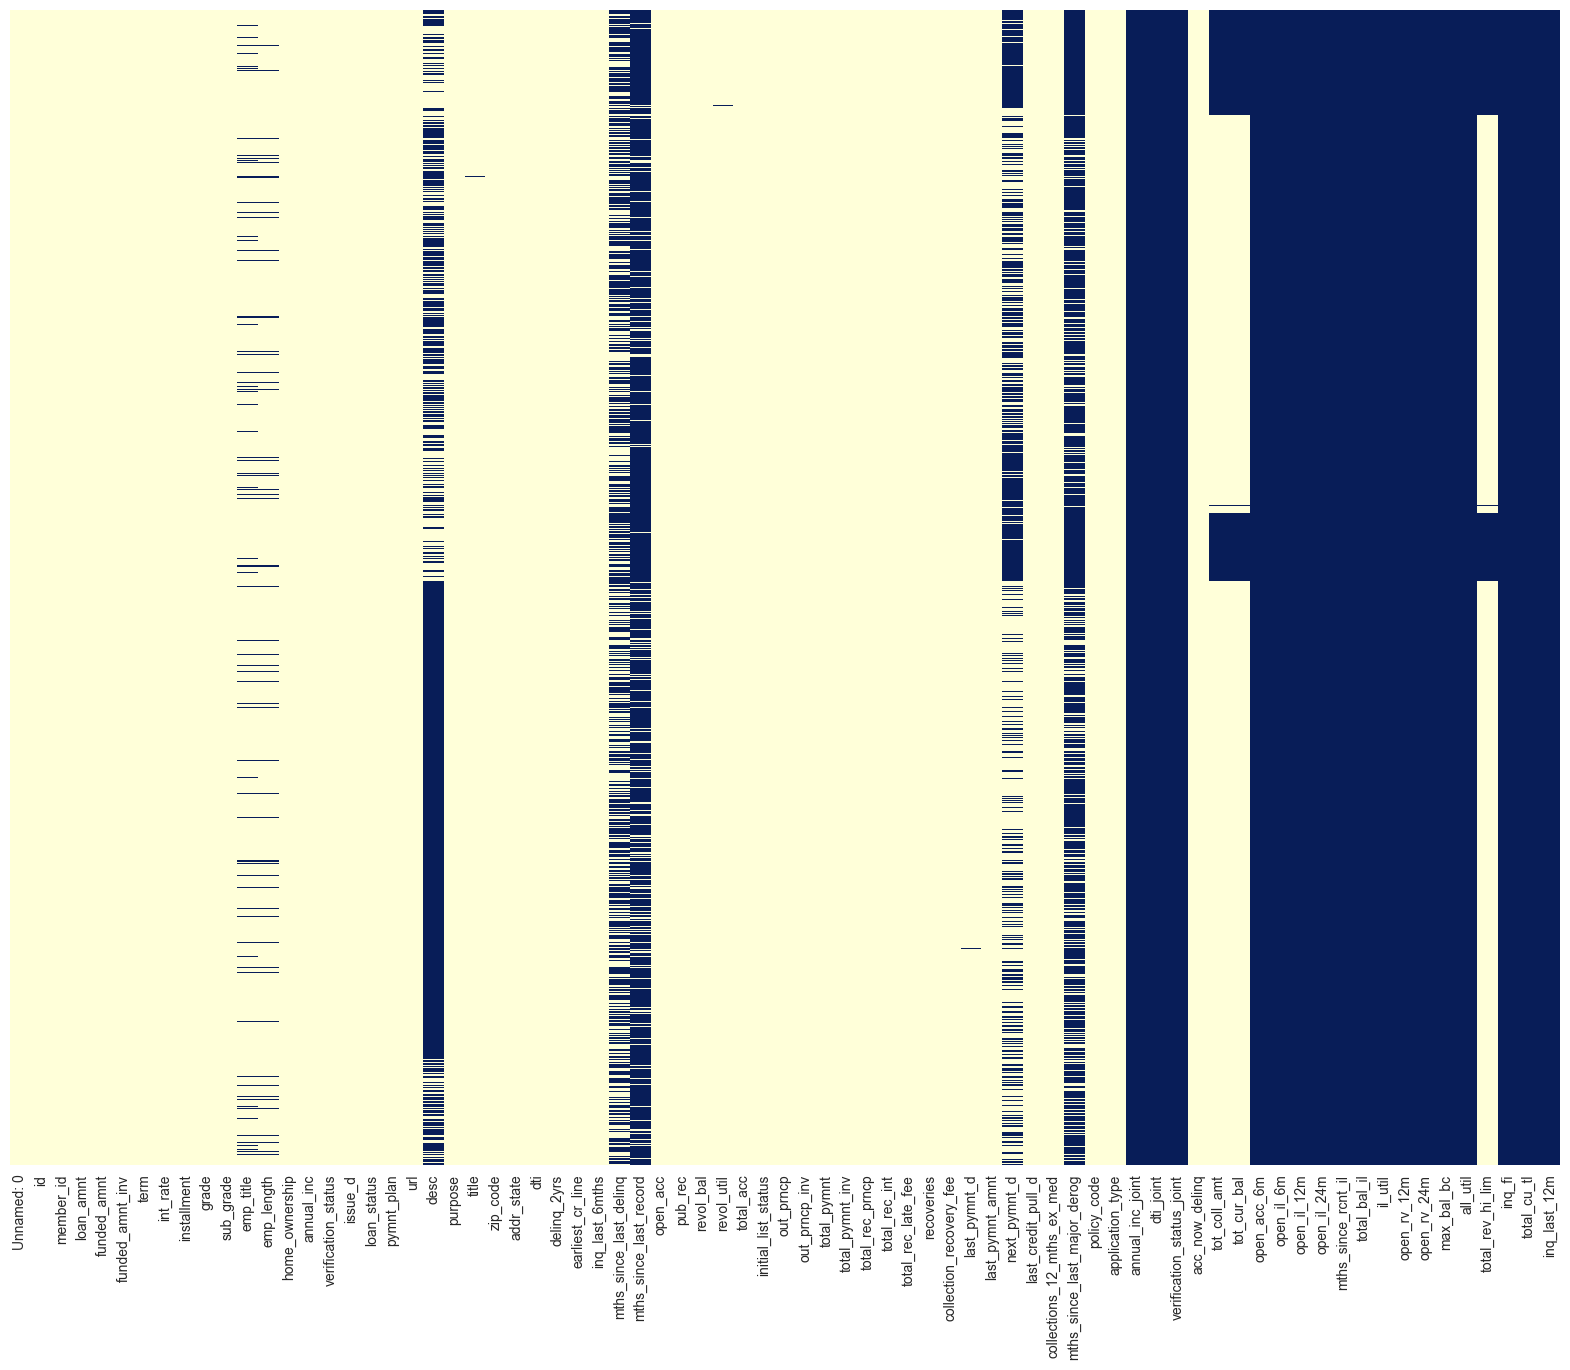

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
plt.show()

In [6]:
train_data.drop(columns=['inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
                         'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                         'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',  'annual_inc_joint', 'dti_joint',
                         'verification_status_joint', 'mths_since_last_major_derog', 'next_pymnt_d',
                         'mths_since_last_delinq', 'mths_since_last_record', 'desc'], inplace=True)

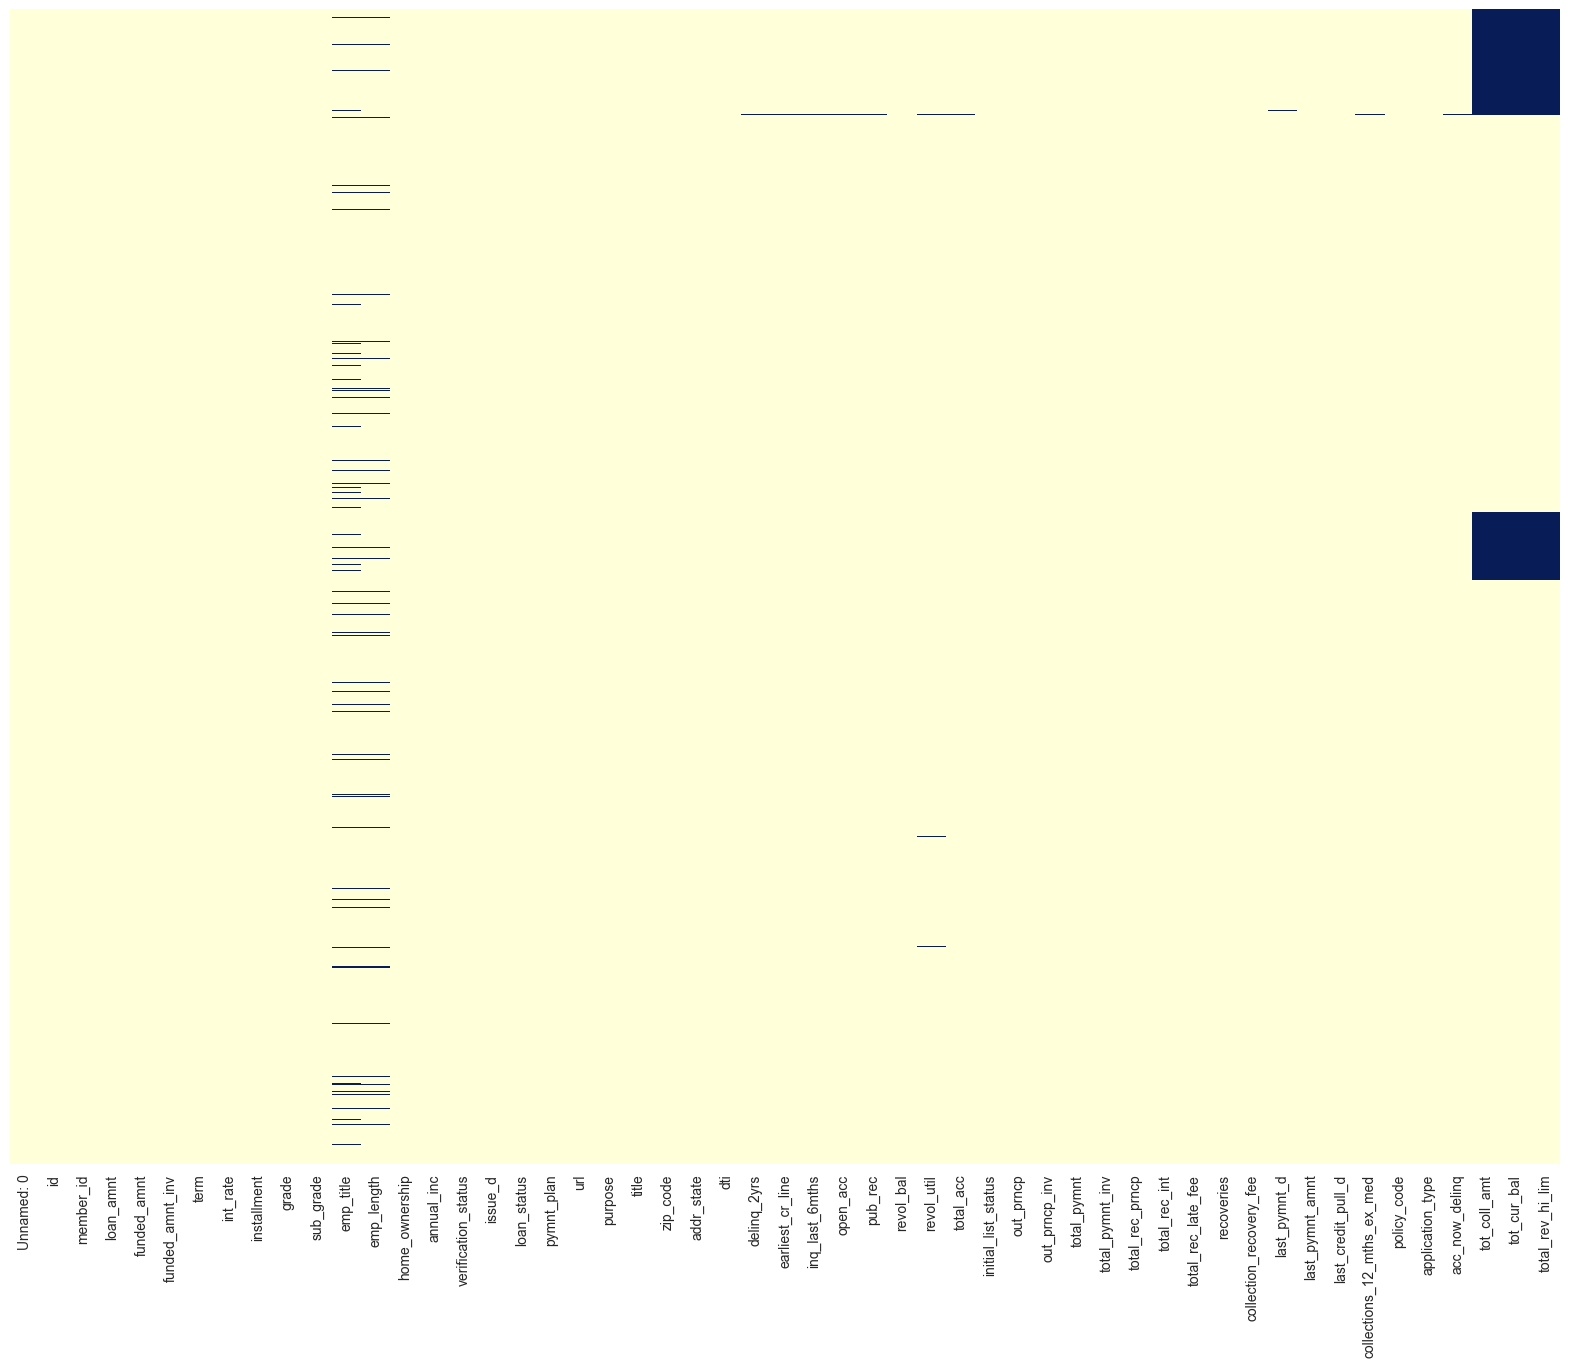

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')
plt.show()

# Penentuan Target
### Penentuan target didasarkan pada fitur loan status 

In [8]:
nan_kolom = ['emp_title', 'emp_length', 'revol_util', 'tot_']

loan_status_map = {
    'Charged Off': 'Bad',
    'Late (31-120 days)': 'Bad',
    'Default': 'Bad',
    'Does not meet the credit policy. Status:Charged Off': 'Bad',
    'Current': 'Good',
    'Fully Paid': 'Good',
    'In Grace Period': 'Good',
    'Does not meet the credit policy. Status:Fully Paid': 'Good',
    'Late (16-30 days)': 'Bad'
}

train_data['loan_category'] = train_data['loan_status'].map(loan_status_map)

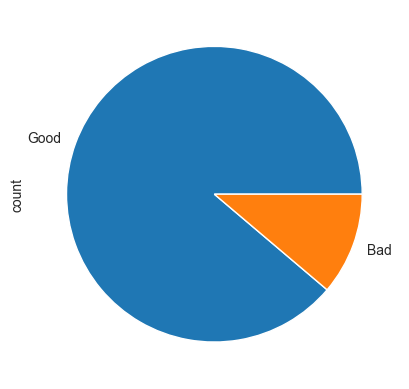

In [9]:
train_data['loan_category'].value_counts().plot(kind='pie')
plt.show()

# Exploratory Data Analysis

In [10]:
bad_data = train_data[train_data['loan_category'] == 'Bad']
good_data = train_data[train_data['loan_category'] == 'Good']

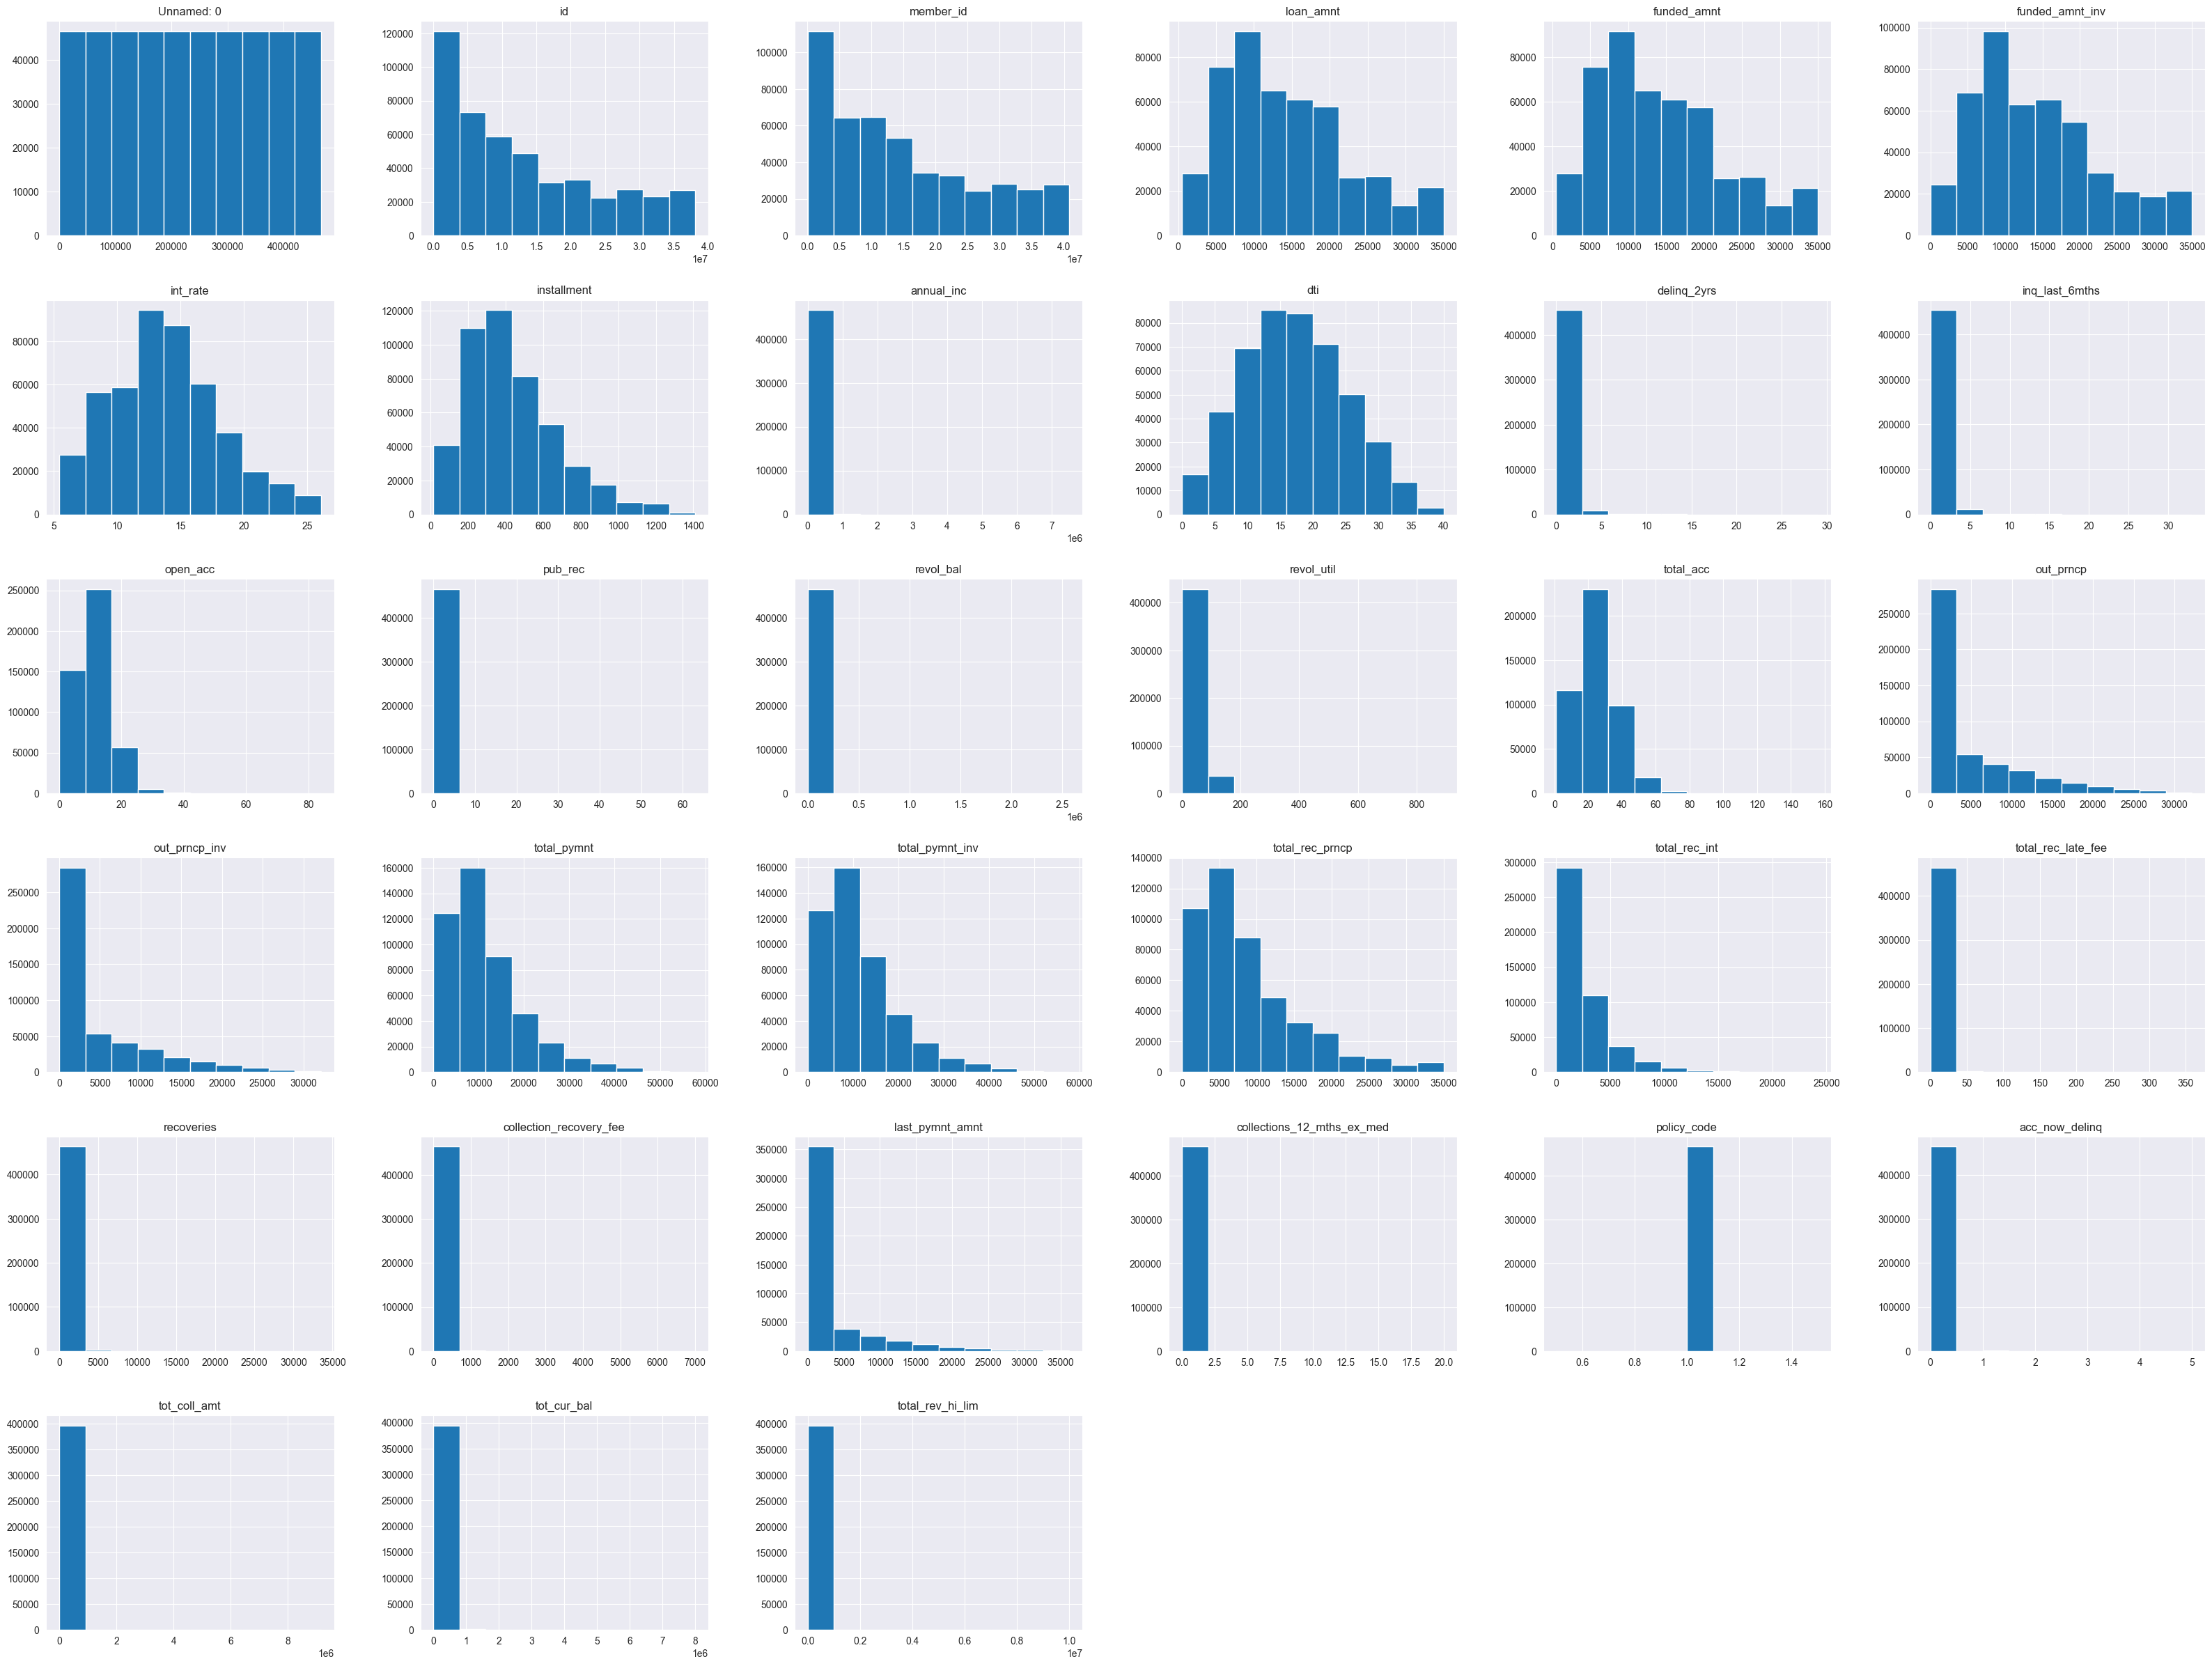

In [11]:
train_data.hist(figsize=(40,30), bins=10)
plt.show()

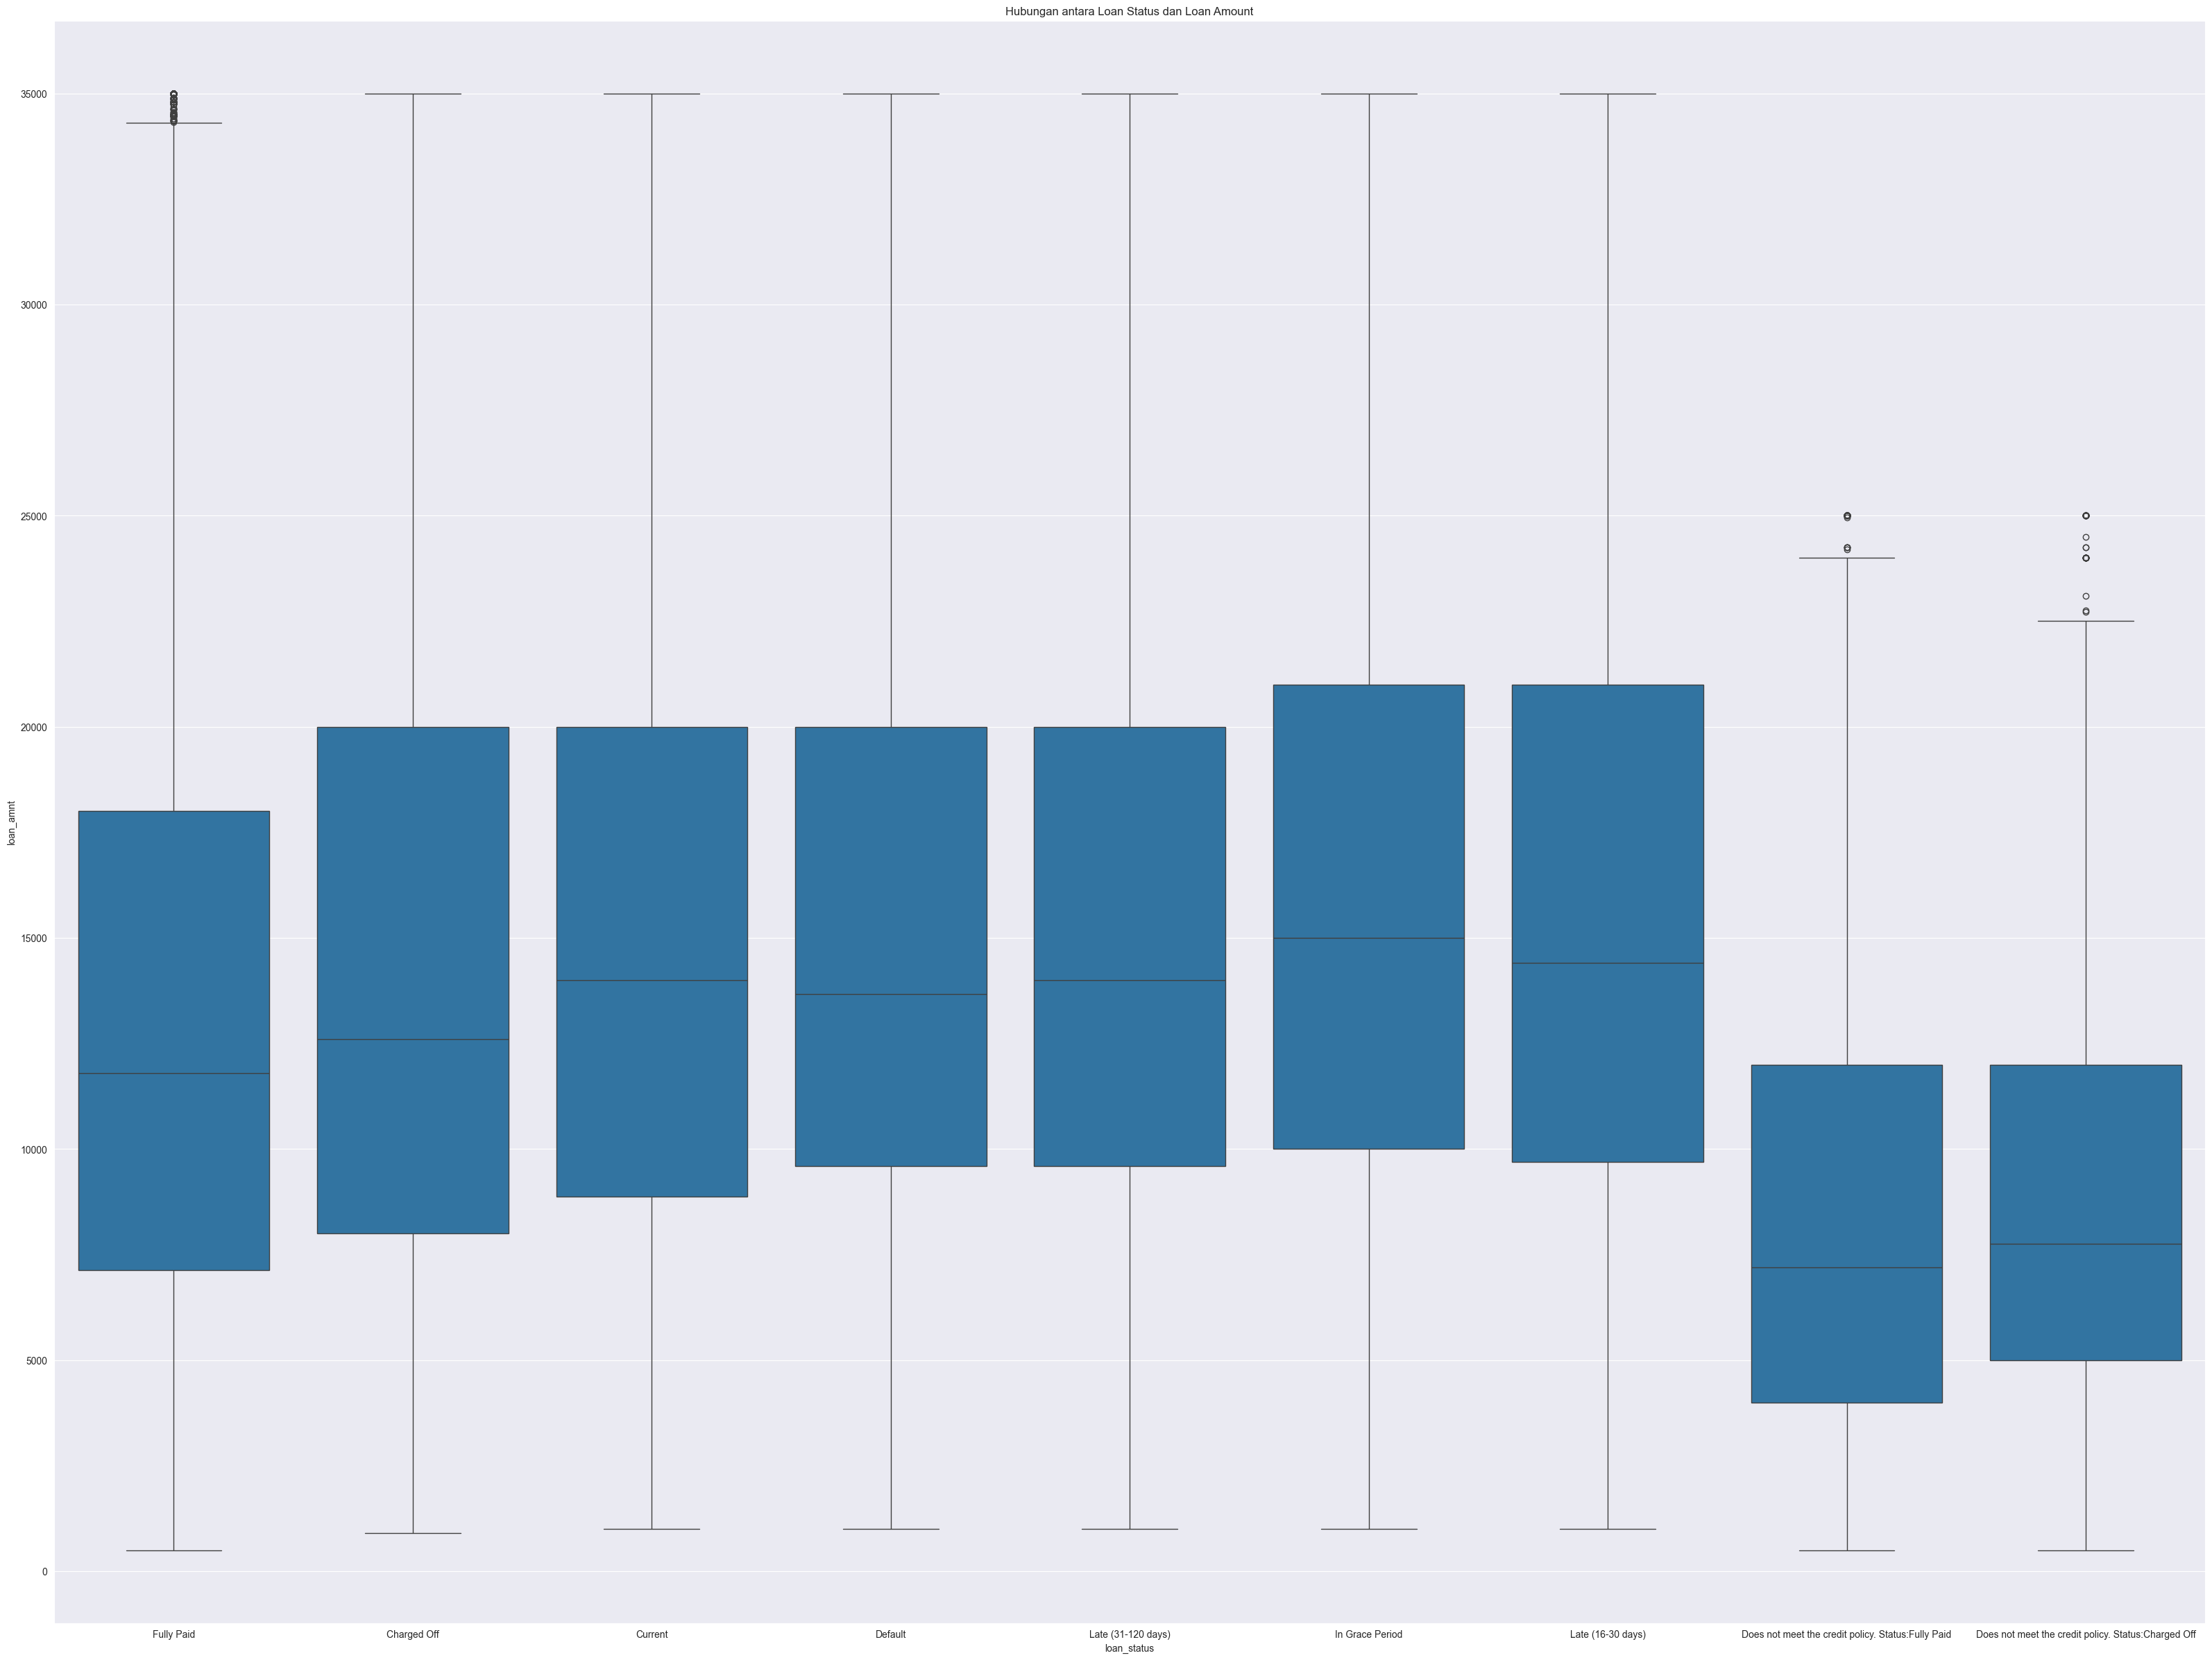

In [12]:
plt.figure(figsize=(40,30))
sns.boxplot(x='loan_status', y='loan_amnt', data=train_data)
plt.title('Hubungan antara Loan Status dan Loan Amount')
plt.show()

# Profil Peminjam

## a. Home Ownership

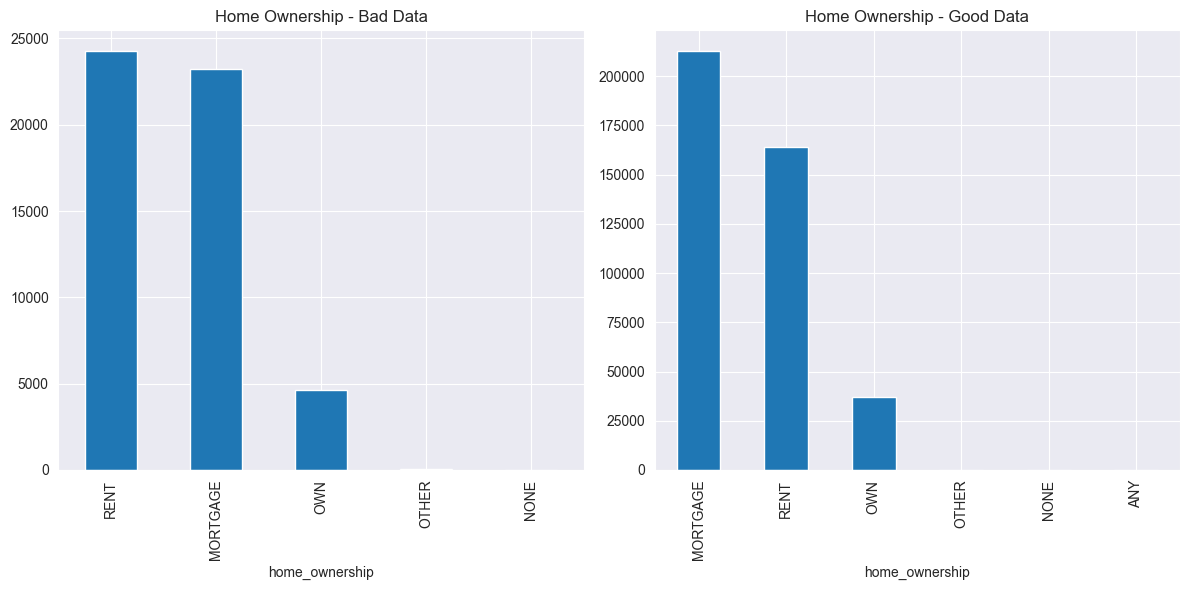

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

bad_data['home_ownership'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Home Ownership - Bad Data')

good_data['home_ownership'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Home Ownership - Good Data')

plt.tight_layout()
plt.show()

## b. State

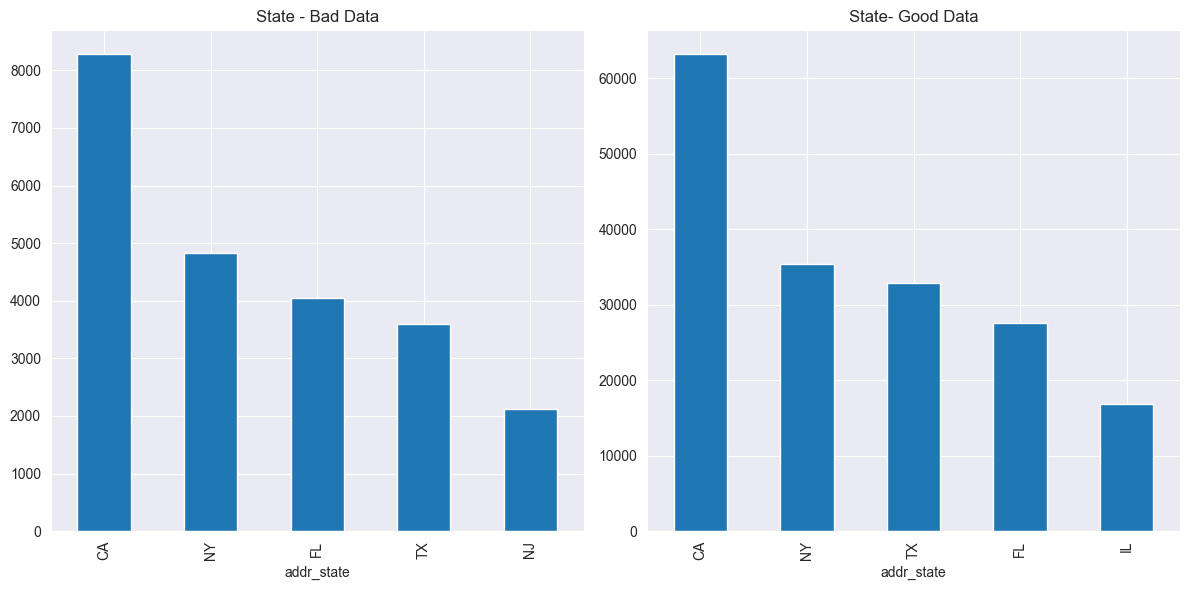

In [14]:
ifig, axs = plt.subplots(1, 2, figsize=(12, 6))

bad_data['addr_state'].value_counts().head(5).plot(kind='bar', ax=axs[0])
axs[0].set_title('State - Bad Data')

good_data['addr_state'].value_counts().head(5).plot(kind='bar', ax=axs[1])
axs[1].set_title('State- Good Data')

plt.tight_layout()
plt.show()

## c. Employee

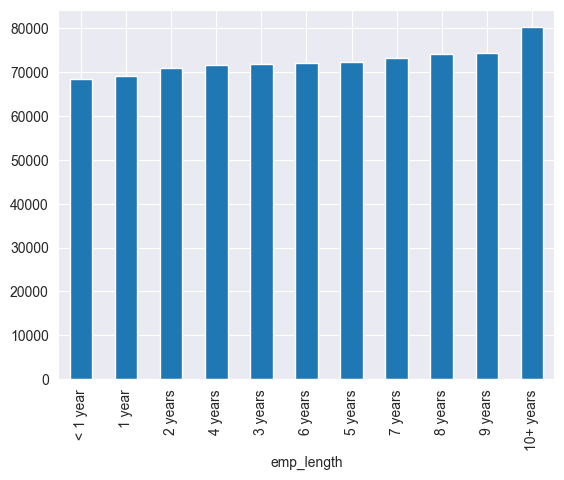

In [15]:
income_emp_length = train_data.groupby('emp_length')['annual_inc'].mean().sort_values()
income_emp_length.plot(kind='bar')
plt.show()

In [16]:
emp_data_ = train_data[['emp_length', 'annual_inc', 'loan_category']].copy(deep=True)
emp_data_['emp_length'] = emp_data_['emp_length'].replace('< 1 year', '0')
emp_data_['emp_length'] = emp_data_['emp_length'].str.extract(r'(\d+)')
emp_data_ = emp_data_.dropna()
emp_data_['emp_length'] = emp_data_['emp_length'].astype(int)
emp_data_['annual_inc'] = emp_data_['annual_inc'].astype(int)

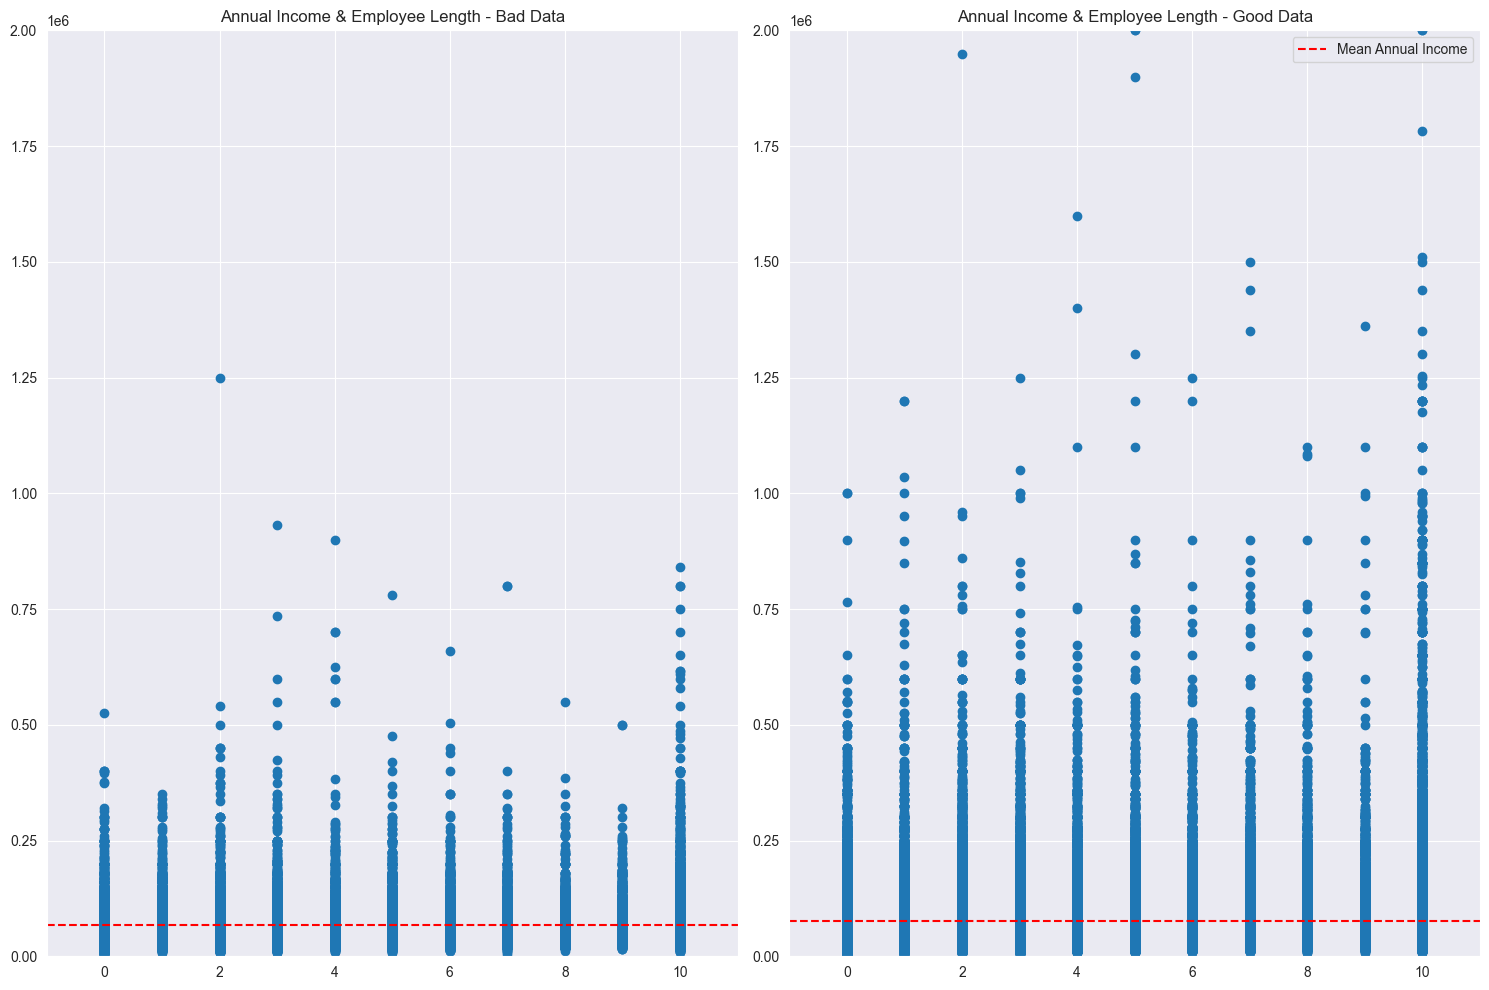

Rata-Rata Annual Income Good Data $ 75349.45
Rata-Rata Annual Income Bad Data $ 66802.44


In [17]:
bad_emp, good_emp = emp_data_[emp_data_['loan_category'] == 'Bad'],  emp_data_[emp_data_['loan_category'] == 'Good']
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].scatter(bad_emp['emp_length'], bad_emp['annual_inc'])
axs[0].axhline(y=np.mean(bad_emp['annual_inc']), color='r', linestyle='--', label='Mean Annual Income')
axs[0].set_title('Annual Income & Employee Length - Bad Data')
axs[0].set_xlim(-1, 11)
axs[0].set_ylim(0, 2000000)

axs[1].scatter(good_emp['emp_length'], good_emp['annual_inc'])
axs[1].set_title('Annual Income & Employee Length - Good Data')
axs[1].axhline(y=np.mean(good_emp['annual_inc']), color='r', linestyle='--', label='Mean Annual Income')
axs[1].set_xlim(-1, 11) 
axs[1].set_ylim(0, 2000000) 

plt.legend()
plt.tight_layout()
plt.show()
print(f"Rata-Rata Annual Income Good Data $ {np.mean(good_emp['annual_inc']):.2f}\nRata-Rata Annual Income Bad Data $ {np.mean(bad_emp['annual_inc']):.2f}")

## d. Data Catatan Publik Merugikan

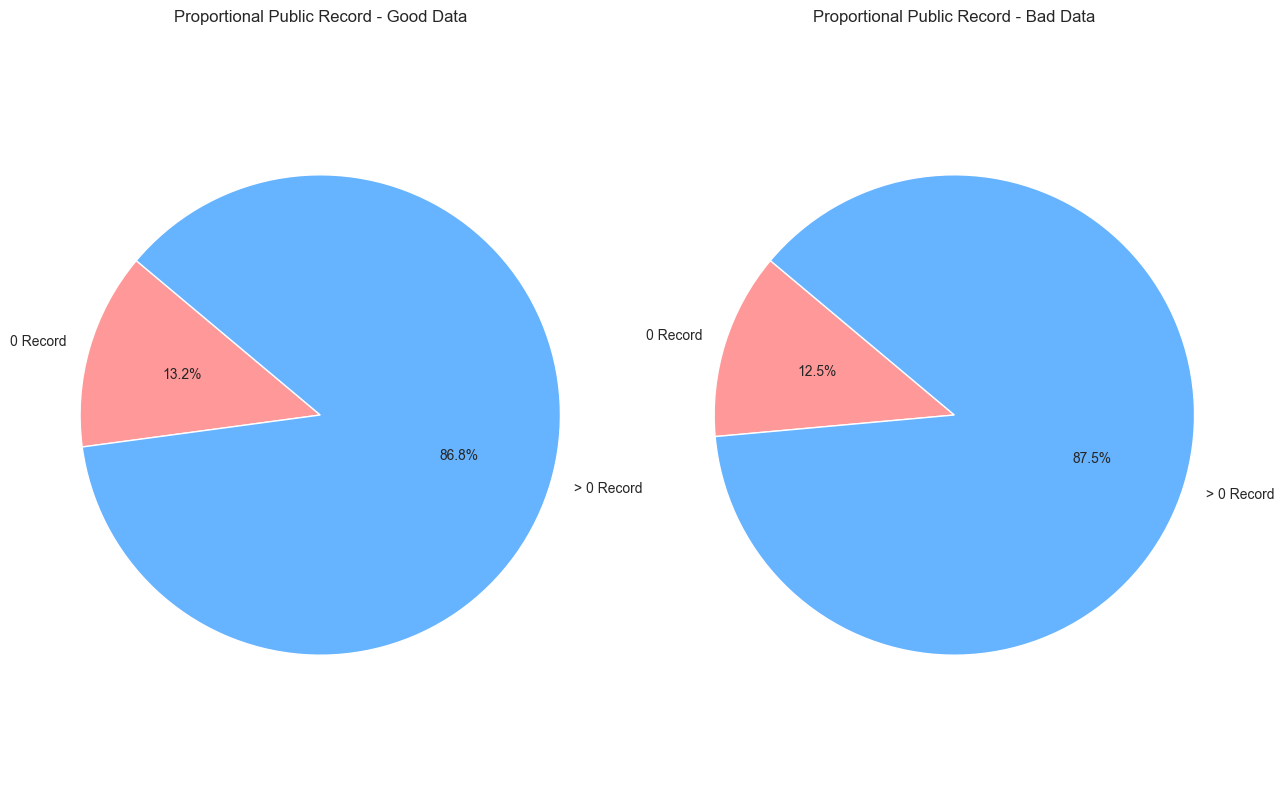

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

bad_pub_rec_non0 = len(train_data[(train_data['pub_rec'] > 0) & (train_data['loan_category'] == 'Bad')]['pub_rec']) / len(train_data[train_data['loan_category'] == 'Bad'])
bad_pub_rec_0 = len(train_data[(train_data['pub_rec'] == 0) & (train_data['loan_category'] == 'Bad')]['pub_rec']) / len(train_data[train_data['loan_category'] == 'Bad'])
good_pub_rec_non0 = len(train_data[(train_data['pub_rec'] > 0) & (train_data['loan_category'] == 'Good')]['pub_rec']) / len(train_data[train_data['loan_category'] == 'Good'])
good_pub_rec_0 = len(train_data[(train_data['pub_rec'] == 0) & (train_data['loan_category'] == 'Good')]['pub_rec']) / len(train_data[train_data['loan_category'] == 'Good'])

sizes_good = [good_pub_rec_non0, good_pub_rec_0]
sizes_bad = [bad_pub_rec_non0, bad_pub_rec_0]

labels = ['0 Record', '> 0 Record']

colors = ['#ff9999','#66b3ff']

axs[0].pie(sizes_good, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0].axis('equal')
axs[0].set_title('Proportional Public Record - Good Data')

axs[1].pie(sizes_bad, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[1].axis('equal')
axs[1].set_title('Proportional Public Record - Bad Data')

plt.show()

# Purpose

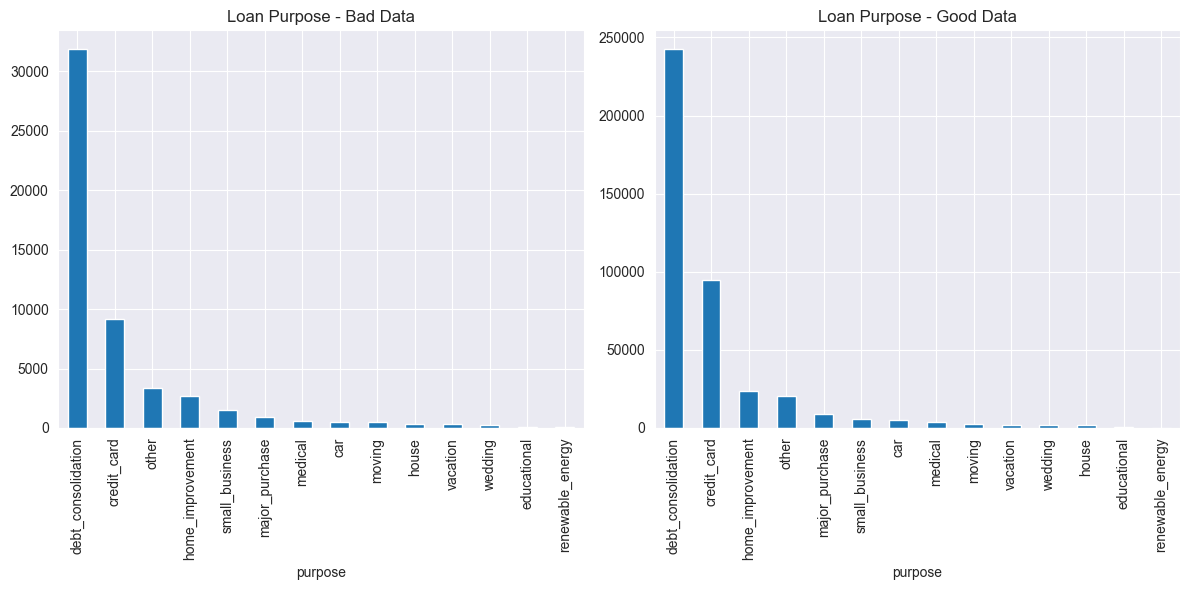

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

bad_data['purpose'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Loan Purpose - Bad Data')

good_data['purpose'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Loan Purpose - Good Data')

plt.tight_layout()
plt.show()

# Suku Bunga

<Figure size 1000x600 with 0 Axes>

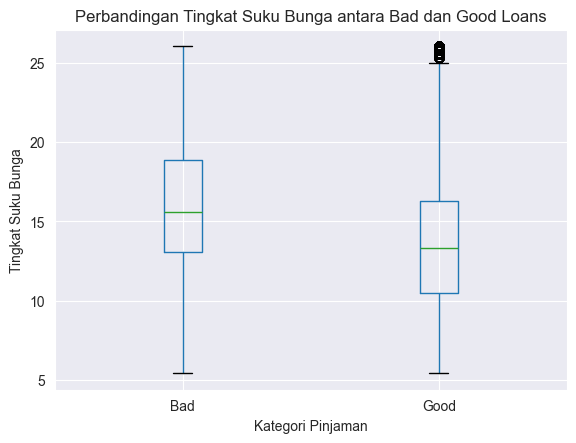

In [20]:
plt.figure(figsize=(10, 6))
train_data.boxplot(column='int_rate', by='loan_category')
plt.title('Perbandingan Tingkat Suku Bunga antara Bad dan Good Loans')
plt.xlabel('Kategori Pinjaman')
plt.ylabel('Tingkat Suku Bunga')
plt.suptitle('')
plt.show()

# Jumlah Pinjaman Dalam Periode Waktu

In [72]:
import pandas as pd


df_daily_loan_amount = init_df.groupby('issue_d')['loan_amnt'].sum().reset_index()

# Membuat grafik menggunakan data yang sudah dikelompokkan
fig = px.line(df_daily_loan_amount, x='issue_d', y='loan_amnt', title='Jumlah Loan Amount Setiap Hari')

fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label='1y', step='year', stepmode='backward'),
                         dict(count=2, label='2y', step='year', stepmode='backward'),
                         dict(count=3, label='3y', step='year', stepmode='backward'),
                         dict(step='all')
                     ])
                 )
                 )

fig.show()


# Peningkatan Fitur

### a. emp_title
Fitur 'emp_title' mengandung informasi tentang judul pekerjaan (job title) dari peminjam. Namun, terdapat beberapa nilai dalam fitur ini yang tidak sepenuhnya menggambarkan sebuah judul pekerjaan, seperti 'AIR RESOURCES BOARD' dan 'Starbucks', yang sebenarnya adalah entitas perusahaan. Kehadiran nilai-nilai semacam ini dapat menyulitkan analisis data, terutama jika kita ingin melakukan pengelompokan atau pemrosesan lanjutan.

Pentingnya memiliki data yang akurat dan relevan dalam fitur 'emp_title' terletak pada kemampuannya untuk memberikan wawasan tentang stabilitas penghasilan dan kualifikasi peminjam. Dalam analisis risiko kredit, stabilitas penghasilan adalah faktor penting dalam menilai kemampuan seorang individu untuk membayar kembali pinjaman. Sebuah pekerjaan dengan gaji yang stabil dan kualifikasi yang tinggi cenderung memberikan indikasi bahwa peminjam memiliki kemampuan finansial yang baik.

### b. purpose
Fitur 'purpose' memberikan informasi tentang tujuan peminjaman dari peminjam. Meskipun fitur ini sudah memberikan wawasan tentang tujuan peminjaman, nilai-nilainya masih bisa dikembangkan lebih lanjut agar model bisa lebih robust ketika menemui nilai yang berbeda. Pengembangan nilai dalam fitur 'purpose' dapat dilakukan dengan mempertimbangkan variasi tujuan peminjaman yang lebih luas, sehingga mencakup berbagai kebutuhan peminjam secara lebih akurat. model dapat lebih sensitif terhadap kebutuhan dan preferensi peminjam.


# Data Preprocessing

In [21]:
label_encoder = LabelEncoder()
train_data['loan_category'] = label_encoder.fit_transform(train_data['loan_category'])

## Handling Missing Data

In [22]:
non_object_data = train_data.select_dtypes(exclude='object').columns

In [23]:
imputer = KNNImputer(n_neighbors=683)
train_data[non_object_data] = imputer.fit_transform(train_data[non_object_data])

In [24]:
train_data['last_pymnt_d'] = train_data['last_pymnt_d'].fillna(train_data['last_pymnt_d'].mode()[0])
train_data['last_credit_pull_d'] = train_data['last_credit_pull_d'].fillna(train_data['last_credit_pull_d'].mode()[0])
train_data['earliest_cr_line'] = train_data['earliest_cr_line'].fillna(train_data['earliest_cr_line'].mode()[0])

# Extract Value Month

In [25]:
train_data['term_int'] = train_data['term'].str.extract(r'(\d+)').astype(int)

In [26]:
train_data['emp_length'] = train_data['emp_length'].fillna(train_data['emp_length'].mode()[0])
train_data['emp_length_int'] = train_data['emp_length'].replace('< 1 year', '0')
train_data['emp_length_int'] = train_data['emp_length'].str.extract(r'(\d+)').astype(int)

# Label Encode

In [27]:
grade = {'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}
train_data['grade'] = train_data['grade'].replace(grade)

In [28]:
subgrade = {}
grade = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
sub = 1
for i in grade:
    for x in range(1, 6):
        subgrade[f'{i}{x}'] = sub
        sub += 1
train_data['sub_grade'] = train_data['sub_grade'].replace(subgrade)

# One Hot Encode
## Home Ownership

In [29]:
home_ownership = pd.get_dummies(train_data['home_ownership'], prefix='home_ownership', drop_first=True)
home_df = pd.concat([train_data, home_ownership], axis=1)

## Verification Status

In [30]:
verification_status = pd.get_dummies(train_data['verification_status'], prefix='ver_stat', drop_first=True)
veri_df = pd.concat([home_df, verification_status], axis=1)

## Purpose

In [31]:
purpose = pd.get_dummies(train_data['purpose'], prefix='purpose', drop_first=True)
purpose_df = pd.concat([veri_df, purpose], axis=1)

## State

In [32]:
addr_state = pd.get_dummies(train_data['addr_state'], prefix='addr_state', drop_first=True)
feature_addr_df = pd.concat([train_data['loan_category'], addr_state], axis=1)

In [33]:
X = feature_addr_df.drop('loan_category', axis=1)
y = feature_addr_df['loan_category']
rf_model = RandomForestClassifier()

rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_
feature_importance_series = pd.Series(feature_importance, index=X.columns)
top_features = feature_importance_series.nlargest(5)

In [34]:
state_df = pd.concat([purpose_df, addr_state[top_features.index]], axis=1)

In [35]:
initial_list_status = pd.get_dummies(train_data['initial_list_status'], prefix='init_list_sts', drop_first=True)
init_df = pd.concat([state_df, initial_list_status], axis=1)

## Casting Data Type to Datetime

In [36]:
init_df['earliest_cr_line'] = pd.to_datetime(init_df['earliest_cr_line'], format='%b-%y')
init_df['issue_d'] = pd.to_datetime(init_df['issue_d'], format='%b-%y')
init_df['last_pymnt_d'] = pd.to_datetime(init_df['last_pymnt_d'], format='%b-%y')
init_df['last_credit_pull_d'] = pd.to_datetime(init_df['last_credit_pull_d'], format='%b-%y')

In [37]:
train_data = init_df.copy(deep=True)

In [38]:
bool_cols = train_data.select_dtypes(include=bool).columns
train_data[bool_cols] = train_data[bool_cols].astype(int)

# Feature Engineering

In [39]:
train_data['last_pymnt_days'] = (train_data['last_pymnt_d'] - train_data['issue_d']).dt.days
train_data['first_crdt_to_new'] = (train_data['issue_d'] - train_data['earliest_cr_line']).dt.days
train_data['last_data_pull'] = (train_data['last_credit_pull_d'] - train_data['issue_d']).dt.days

In [40]:
train_data['loan_to_income_ratio'] = train_data['loan_amnt'] / train_data['annual_inc']
train_data['recovery_rate'] = train_data['recoveries'] / train_data['funded_amnt']
train_data['payment_to_income_ratio'] = train_data['installment'] / (train_data['annual_inc'] / 12)
train_data['debt_to_income_ratio'] = (train_data['funded_amnt'] - train_data['total_rec_prncp']) / train_data['annual_inc']
train_data['fraction_of_total_payments_received'] = train_data['total_pymnt'] / train_data['funded_amnt']
train_data['principal_received_ratio'] = train_data['total_rec_prncp'] / train_data['funded_amnt']
train_data['inquiries_per_month'] = train_data['inq_last_6mths'] / 6

# Drop Unnecessary Data

In [41]:
train_data.drop(columns=['emp_title','home_ownership', 'verification_status', 'purpose',
                         'addr_state', 'initial_list_status' ,'pymnt_plan', 'title', 'zip_code', 'url', 'issue_d', 
                         'loan_status','last_credit_pull_d', 'application_type', 'emp_length', 'earliest_cr_line', 'last_pymnt_d','Unnamed: 0', "id", "term", "member_id" ], inplace=True)

# Outliers

In [168]:
def IQR_outliers(data: pd.DataFrame):
    Q1 = np.percentile(data.values, 25)
    Q3 = np.percentile(data.values, 75)
    IQR_ = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR_
    batas_atas = Q3 + 1.5 * IQR_
    outliers = data[(data < batas_bawah) | (data > batas_atas)]
    return outliers

def outliers(data: pd.DataFrame) -> pd.DataFrame:
    for i in data.columns:
        outliers = IQR_outliers(data[i])
        if len(outliers) > 0:
            data.loc[outliers.index, i] = np.mean(data[i])
    return data

train_data_ = outliers(train_data)

# Deteksi Fitur Penting

In [42]:
X = train_data.drop('loan_category', axis=1)
y = train_data['loan_category']
rf_model = RandomForestClassifier()

rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_
feature_importance_series = pd.Series(feature_importance, index=X.columns)
top_features = feature_importance_series.nlargest(20)

In [43]:
top_features

recovery_rate                          0.111360
principal_received_ratio               0.104072
out_prncp                              0.100431
recoveries                             0.099300
fraction_of_total_payments_received    0.092556
out_prncp_inv                          0.074792
debt_to_income_ratio                   0.071505
collection_recovery_fee                0.056574
last_pymnt_days                        0.044917
total_rec_prncp                        0.035287
last_pymnt_amnt                        0.029156
last_data_pull                         0.025501
total_pymnt                            0.015078
total_pymnt_inv                        0.011237
total_rec_late_fee                     0.010122
installment                            0.009522
funded_amnt_inv                        0.008023
total_rec_int                          0.007378
loan_amnt                              0.007203
funded_amnt                            0.005722
dtype: float64

# Final DF

In [52]:
final_data = train_data[top_features.index].copy()

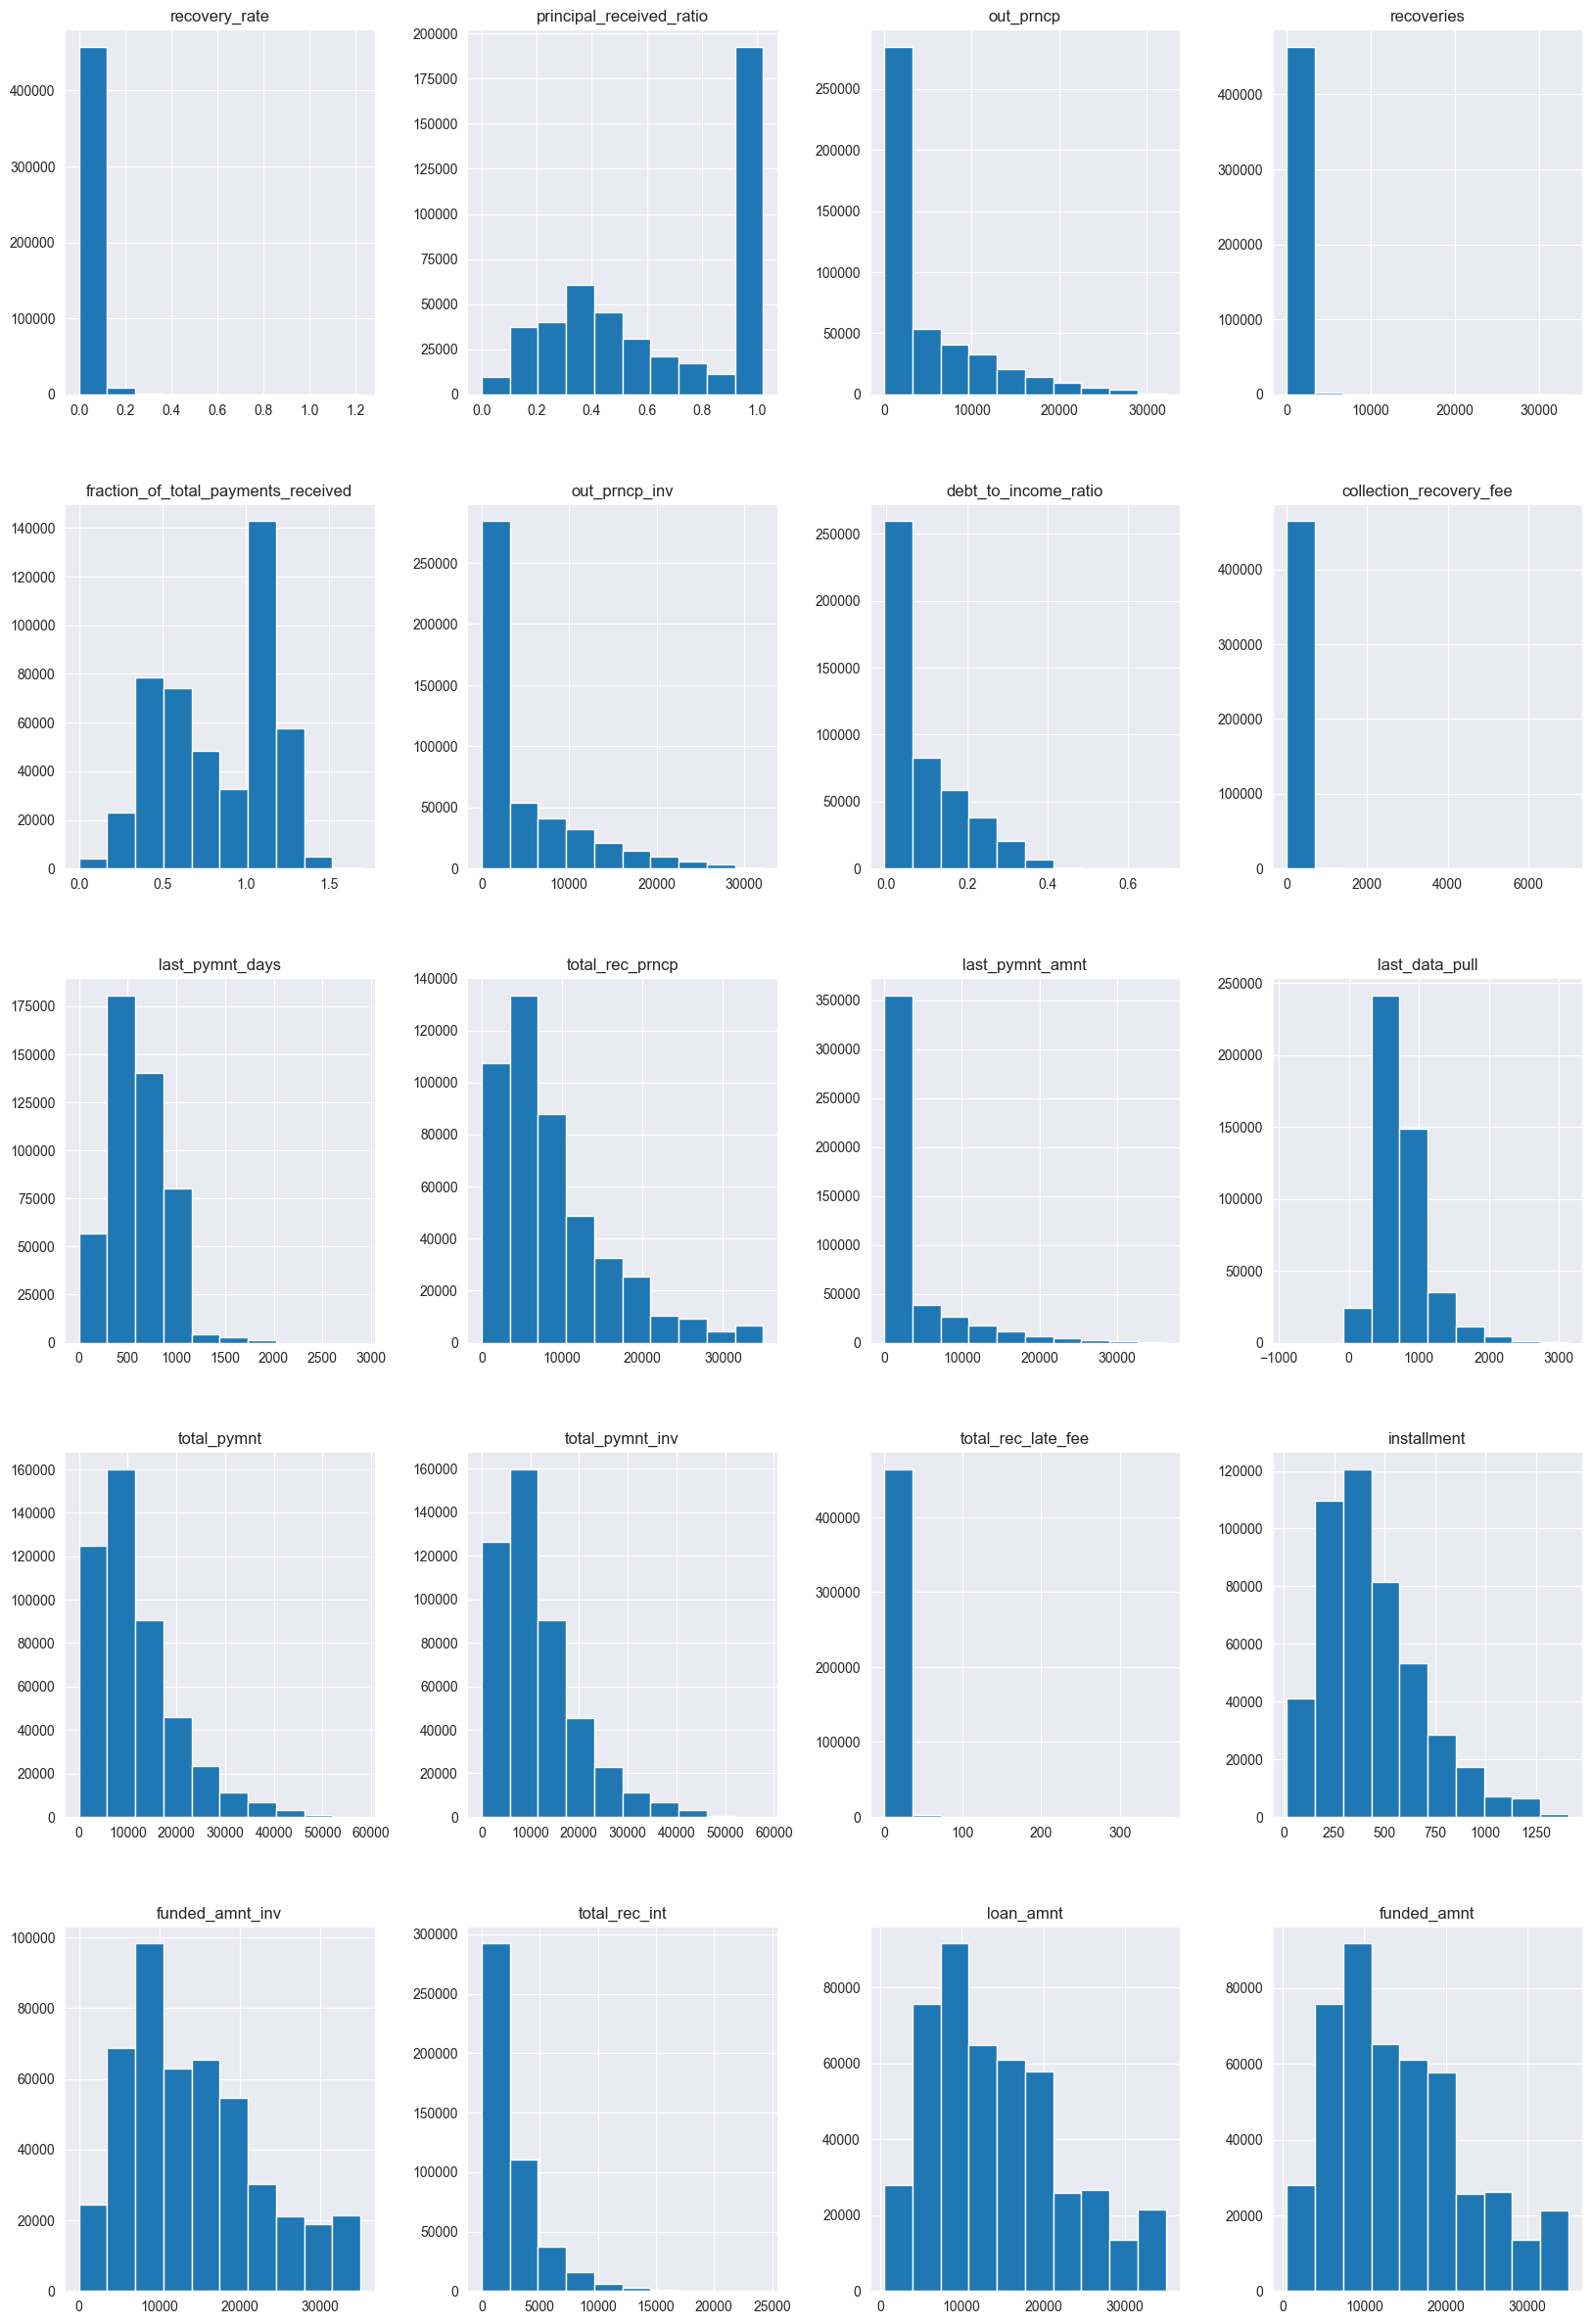

In [53]:
final_data.hist(figsize=(20,30))
plt.show()

In [54]:
final_data['principal_received_ratio'] = np.cbrt(final_data['principal_received_ratio'])
final_data['fraction_of_total_payments_received'] = np.cbrt(final_data['fraction_of_total_payments_received'])
final_data['last_pymnt_days'] = np.sqrt(final_data['last_pymnt_days'])
final_data['total_rec_prncp'] = np.cbrt(final_data['total_rec_prncp'])
final_data['last_data_pull'] = np.cbrt(final_data['last_data_pull'])
final_data['total_pymnt_inv'] = np.cbrt(final_data['total_pymnt_inv'])
final_data['total_pymnt'] = np.cbrt(final_data['total_pymnt'])
final_data['installment'] = np.sqrt(final_data['installment'])
final_data['funded_amnt_inv'] = np.cbrt(final_data['funded_amnt_inv'])
final_data['total_rec_int'] = np.cbrt(final_data['total_rec_int'])
final_data['loan_amnt'] = np.cbrt(final_data['loan_amnt'])
final_data['funded_amnt'] = np.cbrt(final_data['funded_amnt'])

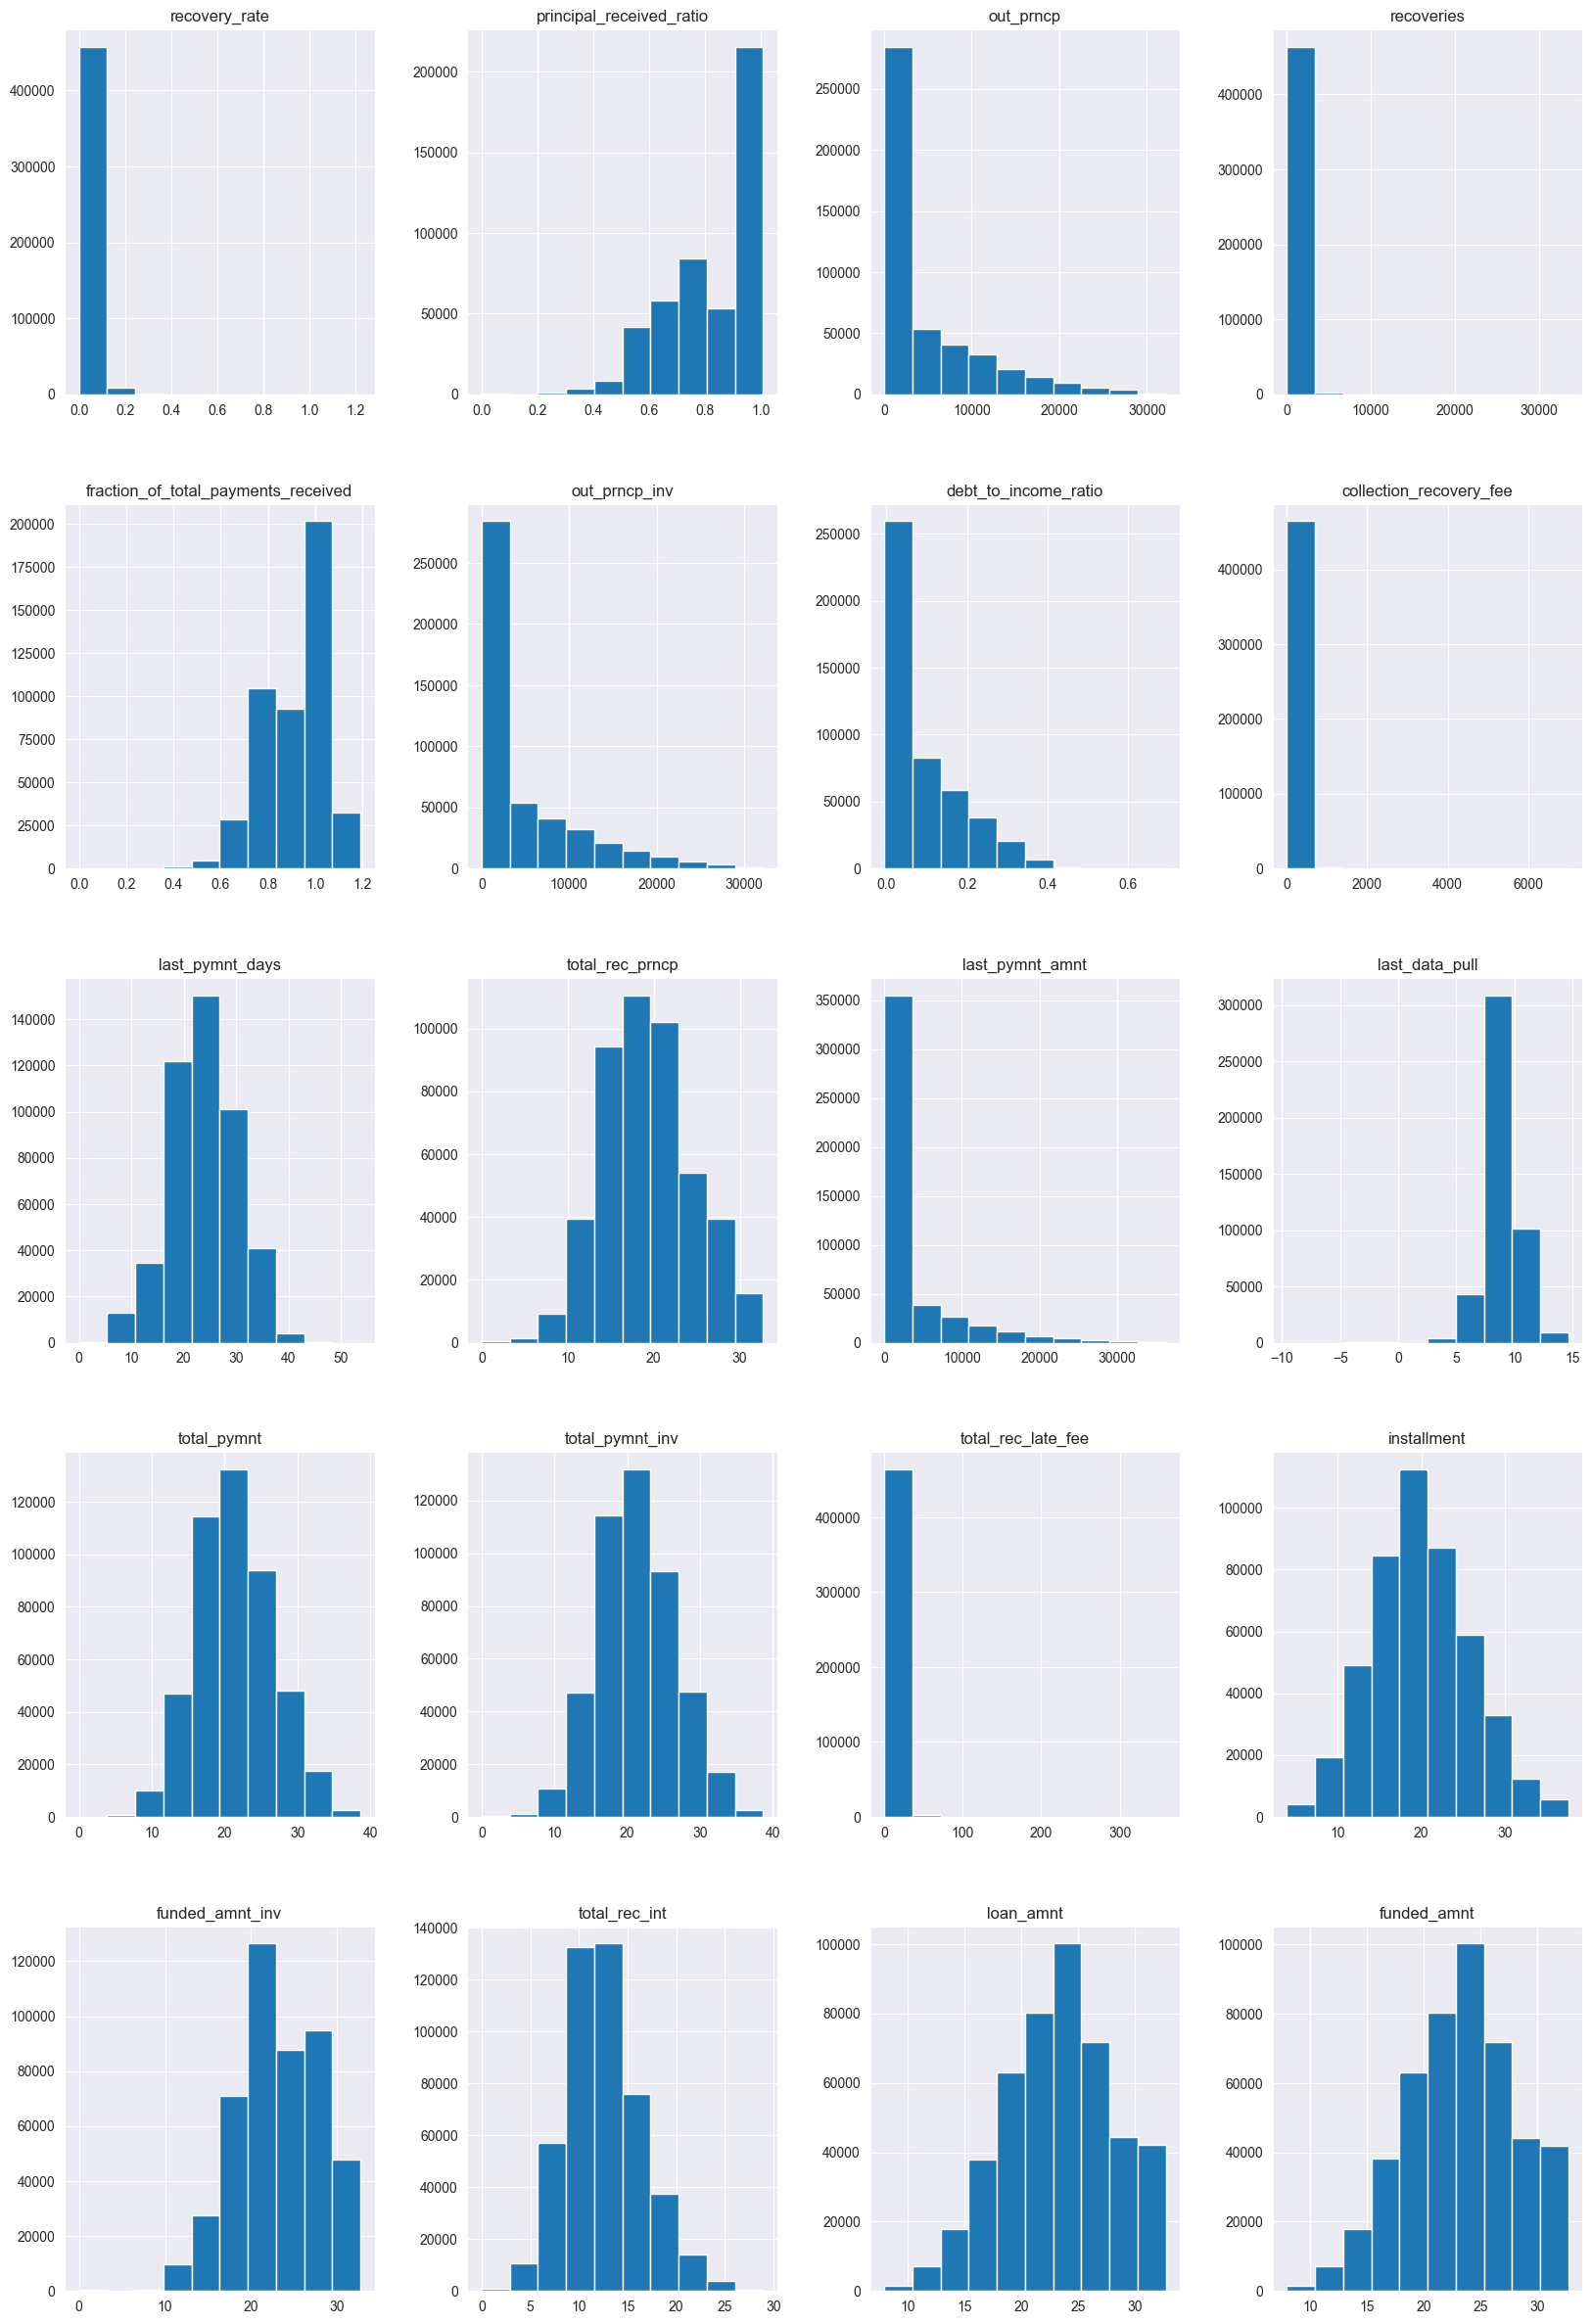

In [55]:
final_data.hist(figsize=(20,30)) 
plt.show()

# Minmax Scaler

In [56]:
scaler = MinMaxScaler()
X_final = scaler.fit_transform(final_data) 
X = pd.DataFrame(X_final)

# Handling Imbalance Data

In [57]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

# Train Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=11)

# Logistic Regression

In [249]:
def objective(trial):
    C = trial.suggest_float("C", 1e-5, 1e5)
    solver = trial.suggest_categorical("solver", ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
    tol = trial.suggest_float("tol", 1e-4, 1e-1)
    max_iter = trial.suggest_int("max_iter", 100, 1000)
    l1_ratio = trial.suggest_float('l1_ratio',  1e-4, 1e-1)

    model = LogisticRegression(C=C, solver=solver, penalty=penalty, tol=tol, max_iter=max_iter, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)

    return f1


study =  optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

best_params = study.best_params
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
f1_best = f1_score(y_test, y_pred_best)
print(f"Best F1 score: {f1_best}")


[I 2024-05-13 18:40:37,057] A new study created in memory with name: no-name-446fb3e8-316c-42e5-92bf-7bc62621a0e0
[I 2024-05-13 18:42:59,070] Trial 0 finished with value: 0.9120357122417444 and parameters: {'C': 70508.03654630015, 'solver': 'liblinear', 'penalty': 'l1', 'tol': 0.02077528008885938, 'max_iter': 747, 'l1_ratio': 0.026153049328529736}. Best is trial 0 with value: 0.9120357122417444.
[I 2024-05-13 18:43:14,150] Trial 1 finished with value: 0.9340511907102624 and parameters: {'C': 21039.430888219373, 'solver': 'saga', 'penalty': 'l1', 'tol': 0.015097169711685655, 'max_iter': 564, 'l1_ratio': 0.06974339492245897}. Best is trial 1 with value: 0.9340511907102624.
[I 2024-05-13 18:43:17,261] Trial 2 finished with value: 0.9060302113415971 and parameters: {'C': 43341.701875997605, 'solver': 'liblinear', 'penalty': 'l2', 'tol': 0.05736784601831903, 'max_iter': 882, 'l1_ratio': 0.034433663627406914}. Best is trial 1 with value: 0.9340511907102624.
[W 2024-05-13 18:43:17,263] Trial 

ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.

In [83]:
model_1 = LogisticRegression(C= 21039.430888219373, solver= 'saga', penalty ='l1', tol= 0.015097169711685655, max_iter= 564, l1_ratio= 0.06974339492245897)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     82713
         1.0       0.90      0.97      0.93     82927

    accuracy                           0.93    165640
   macro avg       0.93      0.93      0.93    165640
weighted avg       0.93      0.93      0.93    165640


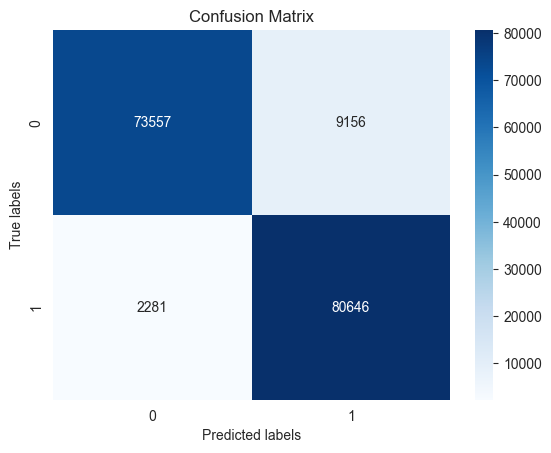

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

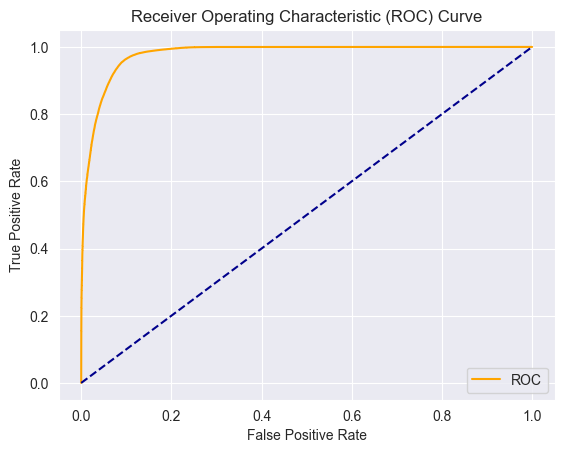

In [85]:
y_pred_proba = model_1.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Random Forest

In [260]:
`def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1500)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])  

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   criterion=criterion)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    f1 =f1_score(y_test, y_pred)

    return f1

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_trial = study.best_trial
best_params = best_trial.params

print("Best parameters:", best_params)
print("Best accuracy:", best_trial.value)

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

best_f1= best_model.score(X_test, y_test)
print("Validation accuracy of the best model:", best_f1)


[I 2024-05-13 20:50:04,779] A new study created in memory with name: no-name-91905abd-ba2a-4a32-99fc-63ecd421d0de
[I 2024-05-13 21:39:31,558] Trial 0 finished with value: 0.9873357199634236 and parameters: {'n_estimators': 992, 'max_depth': 31, 'min_samples_split': 24, 'min_samples_leaf': 31, 'criterion': 'gini'}. Best is trial 0 with value: 0.9873357199634236.
[I 2024-05-13 22:15:55,513] Trial 1 finished with value: 0.9854086473905649 and parameters: {'n_estimators': 734, 'max_depth': 41, 'min_samples_split': 8, 'min_samples_leaf': 43, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9873357199634236.
[I 2024-05-13 22:21:02,890] Trial 2 finished with value: 0.9592767012560173 and parameters: {'n_estimators': 120, 'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 1, 'criterion': 'gini'}. Best is trial 0 with value: 0.9873357199634236.
[W 2024-05-13 22:22:30,736] Trial 3 failed with parameters: {'n_estimators': 1479, 'max_depth': 45, 'min_samples_split': 12, 'min_sampl

KeyboardInterrupt: 

In [81]:
model_2 = RandomForestClassifier(n_estimators= 992, max_depth= 31, min_samples_split= 24, min_samples_leaf= 31, criterion= 'gini')
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     82713
         1.0       0.98      1.00      0.99     82927

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640


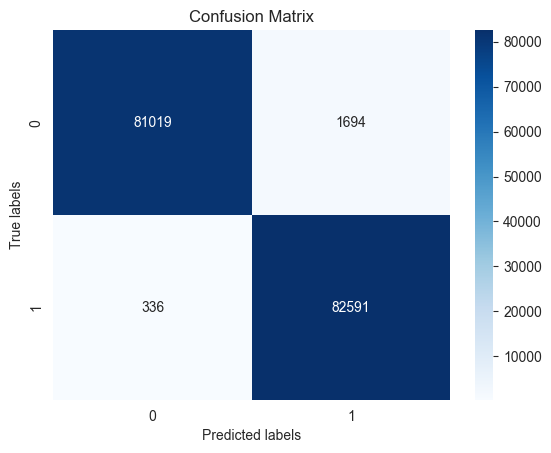

In [82]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

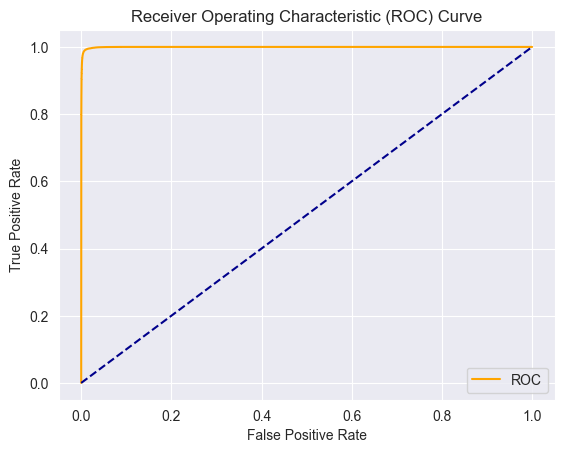

In [79]:
y_pred_proba = model_2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
